# 스팸 분류

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-52-스팸분류.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-52-스팸분류.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
#!curl -L https://bit.ly/2WC9nvn -o sms_spam.csv
!curl -L https://github.com/swkim01/DSAC3/raw/main/sms_spam.csv -o sms_spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0    639      0 --:--:-- --:--:-- --:--:--   639
100  488k  100  488k    0     0   997k      0 --:--:-- --:--:-- --:--:-- 13.7M


In [3]:
sms = pd.read_csv('sms_spam.csv', encoding='latin-1')
x = sms['text'].tolist()
y = sms['type'].tolist()

In [4]:
x[:4], y[:4]

(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  'Ok lar... Joking wif u oni...',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  'U dun say so early hor... U c already then say...'],
 ['ham', 'ham', 'spam', 'ham'])

- Tfidf 로 문서-단어 행렬을 만든다
- 나이브 베이즈 알고리즘으로 성능을 측정한다

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#tfidf = TfidfVectorizer("english")
tfidf = TfidfVectorizer()
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

mnb = MultinomialNB()
mnb.fit(x_train_tf, y_train)

MultinomialNB()

In [7]:
from sklearn import metrics
y_pred = mnb.predict(x_test_tf) # 학습된 모델을 이용하여 예측
print(metrics.classification_report(y_test, y_pred)) # 분류 성능 평가

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1454
        spam       1.00      0.74      0.85       219

    accuracy                           0.97      1673
   macro avg       0.98      0.87      0.92      1673
weighted avg       0.97      0.97      0.96      1673



In [ ]:
print ("score :", mnb.score(x_test_tf, y_test))

score : 0.9581589958158996


# 다른 알고리즘 비교

In [ ]:
import seaborn as sns
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
def text_process(text):
    #구분자 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    #모든 텍스트를 소문자로 바꾸고, stopword를 제거함
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [ ]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [ ]:
#train데이터를 각각의 classifier에 fit하기 위한 함수
def train_classifier(clf, X_train, y_train): 
    clf.fit(X_train, y_train)

#feature를 각각의 classifier를 이용해 예측
def predict_labels(clf, features):
    return (clf.predict(features))

#pred_scores 리스트를 만들고, 분류기의 예측 결과들을 리스트의 원소로 함
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, x_train_tf, y_train) #train데이터를 이용해 분류
    pred = predict_labels(v,x_test_tf) #예측
    pred_scores.append((k, [accuracy_score(y_test,pred)]))#accuracy 스코어를 리스트에 추가

In [ ]:
#각각의 classifier 스코어 출력
#df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df = pd.DataFrame.from_dict(dict(pred_scores), orient='index', columns=['Score'])
df

,Score
SVC,0.987448
KN,0.949193
NB,0.983264
DT,0.964136
LR,0.964734
RF,0.974895
AdaBoost,0.972504
BgC,0.965332
ETC,0.980275


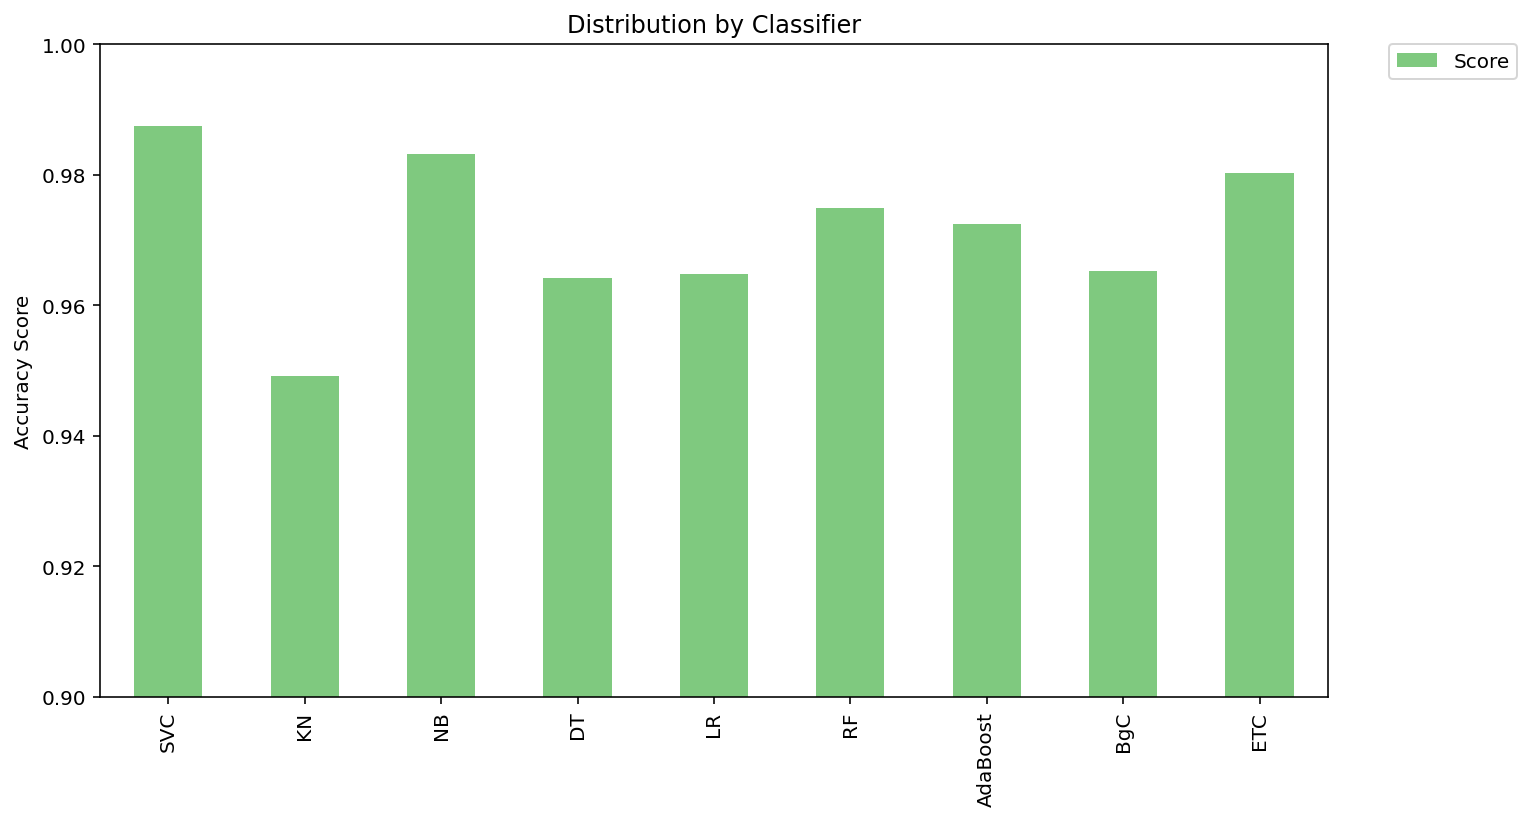

In [ ]:
#classifier에 따른 accuracy 히스토그램
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
%config InlineBackend.figure_format = 'retina'